In [1]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Using Seaborn Styles

## Setting Styles
 - Seaborn has defualt configurations that can be applied with sns.set()
 - These styles can <b>override</b> matplotlib and pandas plots as well

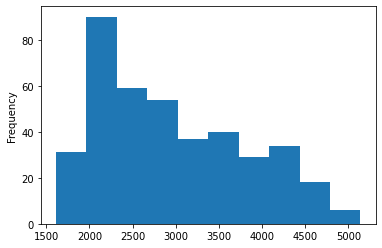

In [3]:
# Pandas histogram
mpg['weight'].plot.hist()
plt.show()

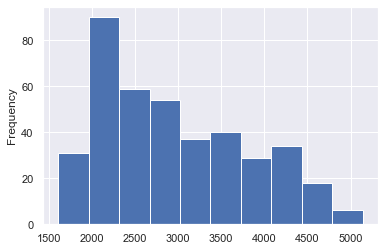

In [4]:
# Pandas histogram after sns.set()
sns.set()
mpg['weight'].plot.hist()
plt.show()

## Theme examples with sns.set_style()

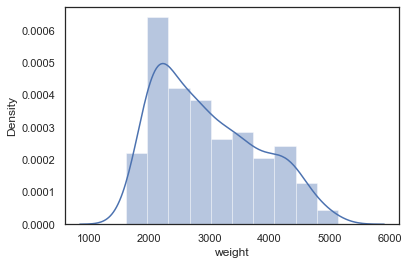

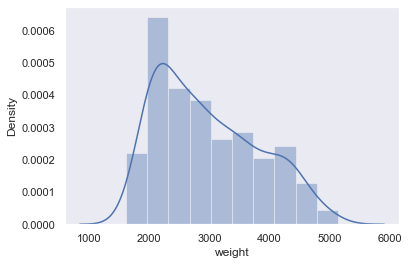

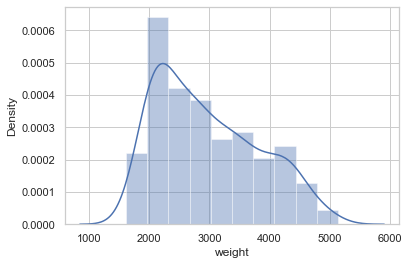

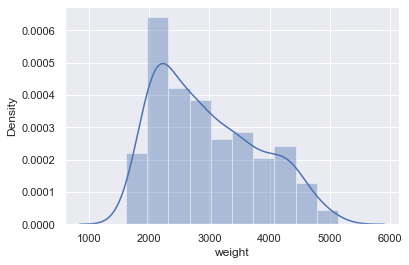

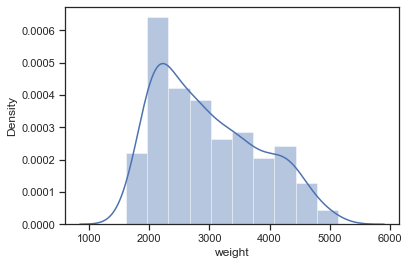

In [5]:
for style in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    sns.set_style(style)
    sns.distplot(mpg['weight'])
    plt.show()

## Removing axes with despine()

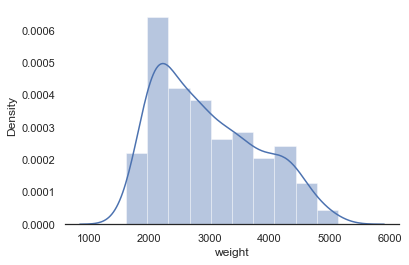

In [6]:
plt.clf()
sns.set_style('white')
sns.distplot(mpg['weight'])
sns.despine(left=True)
plt.show()

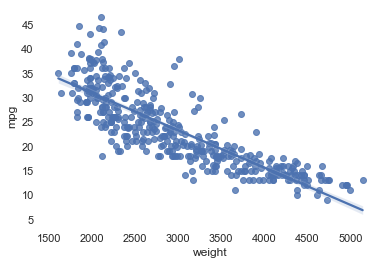

In [7]:
plt.clf()
sns.set_style('white')
sns.regplot(x='weight', y='mpg', data=mpg)
sns.despine(left=True, bottom=True)
plt.show()

# Colors in Seaborn

## Defining a color for a plot
 - Seaborn supports assigning colors to plots using matplotlib color codes

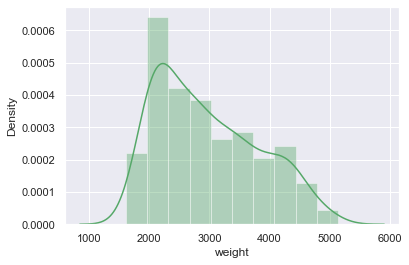

In [8]:
plt.clf()
sns.set(color_codes=True)
sns.distplot(mpg['weight'], color='g')
plt.show()

## Palettes
 - Seaborn uses the set_palette() function to define a palette

In [9]:
for p in sns.palettes.SEABORN_PALETTES:
    print(p)

deep
deep6
muted
muted6
pastel
pastel6
bright
bright6
dark
dark6
colorblind
colorblind6


<Figure size 432x288 with 0 Axes>

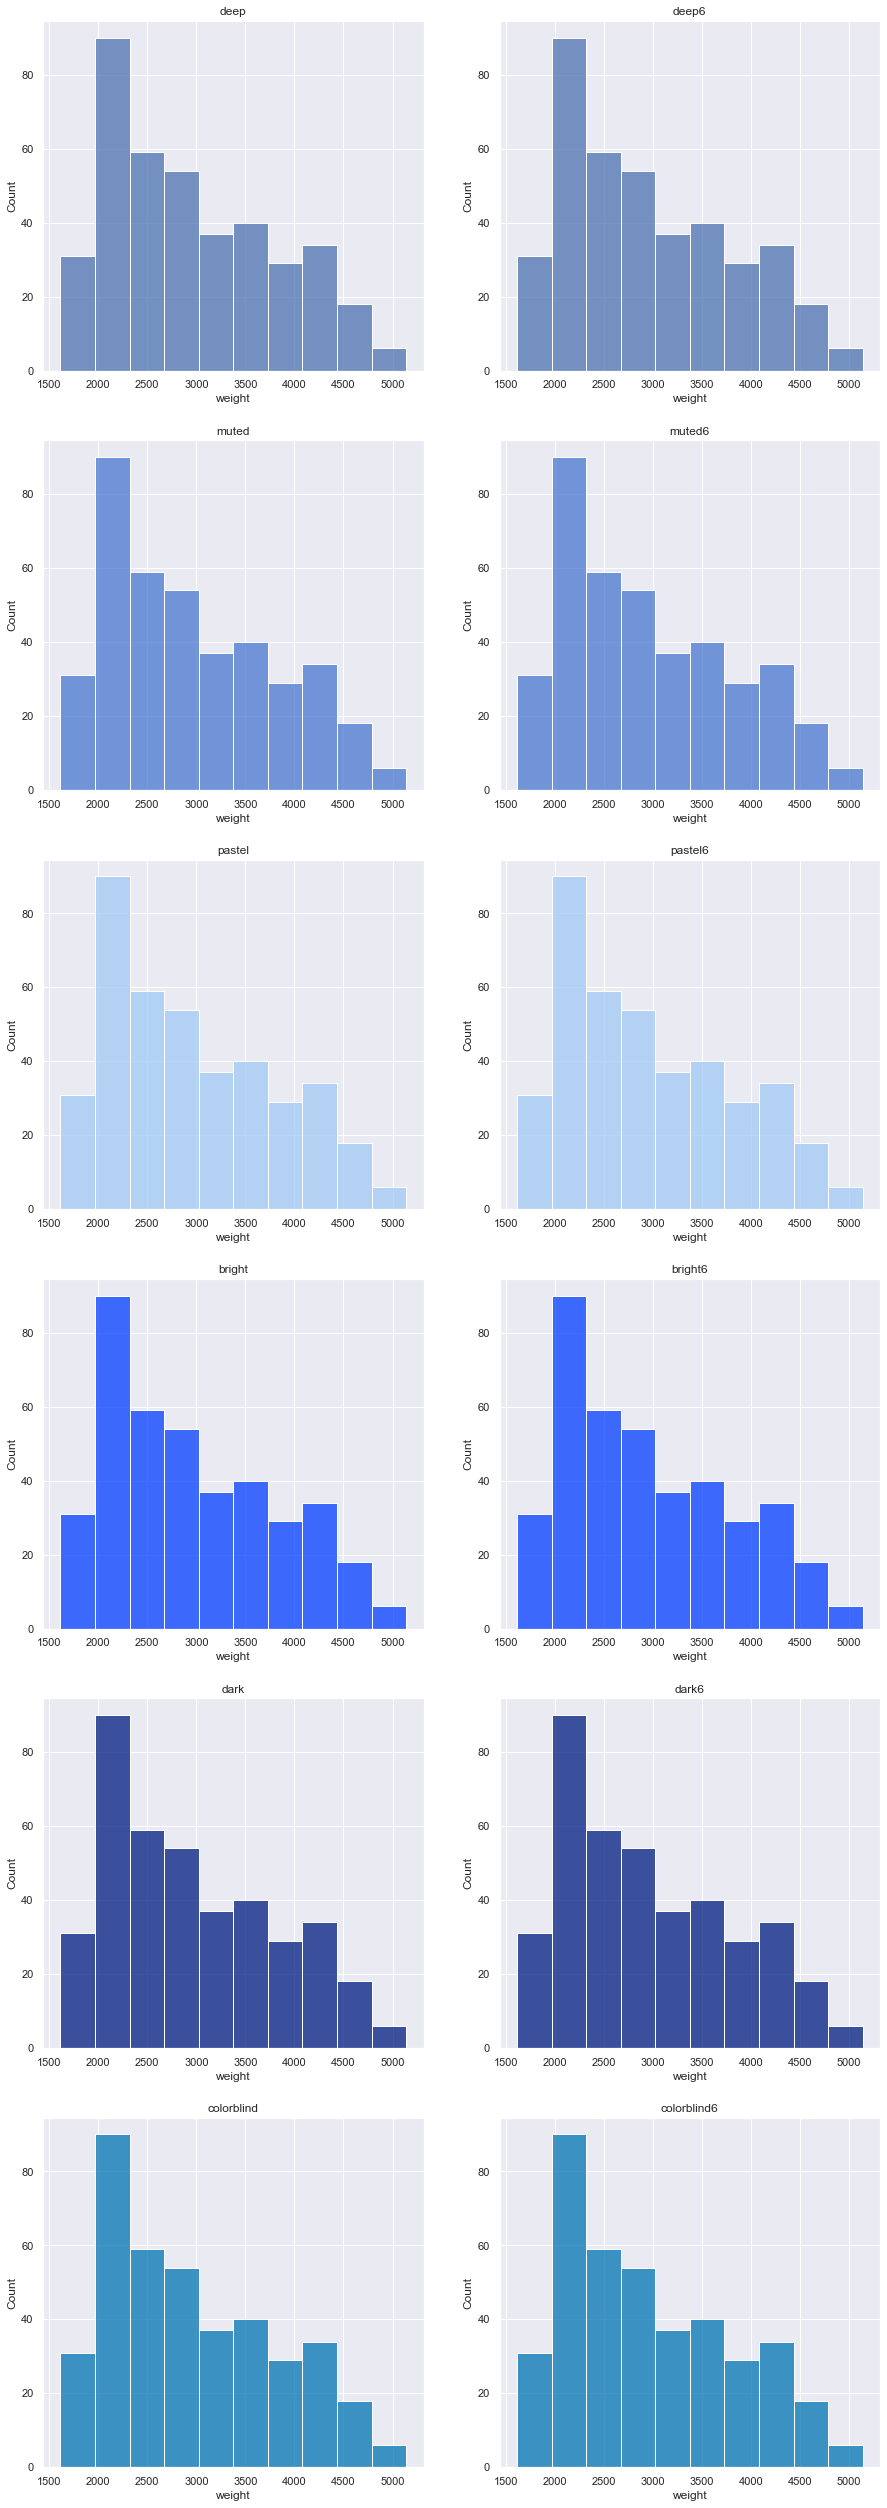

In [10]:
plt.clf()
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 45))

for i, p in enumerate(sns.palettes.SEABORN_PALETTES):
    sns.set_palette(p)
    ax = axes[i//2, i%2]
    sns.histplot(mpg['weight'], ax=ax)
    ax.set_title(str(p))

plt.show()

<Figure size 432x288 with 0 Axes>

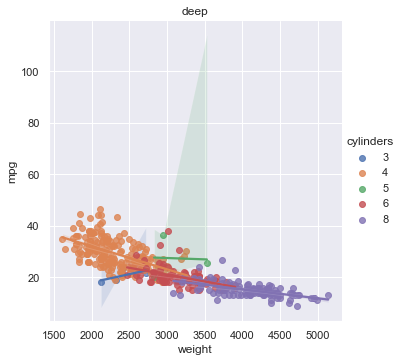

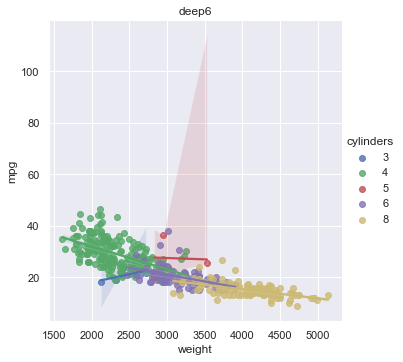

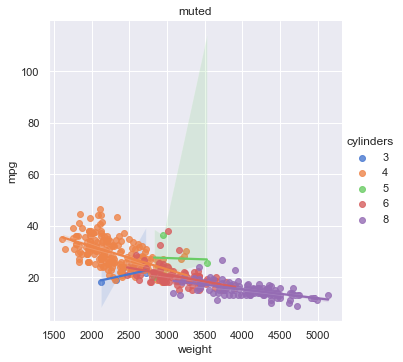

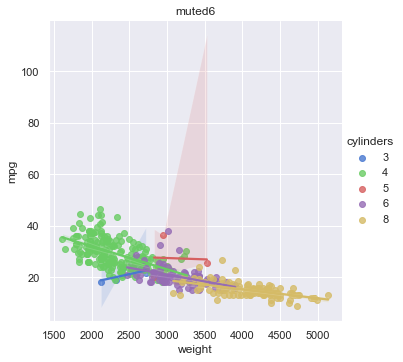

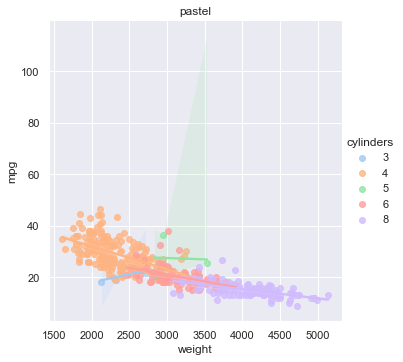

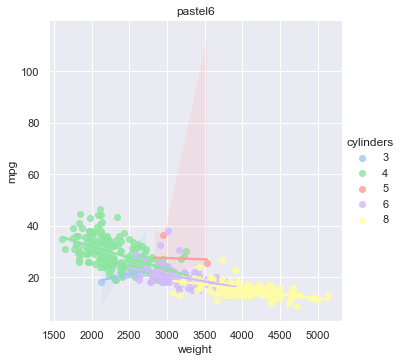

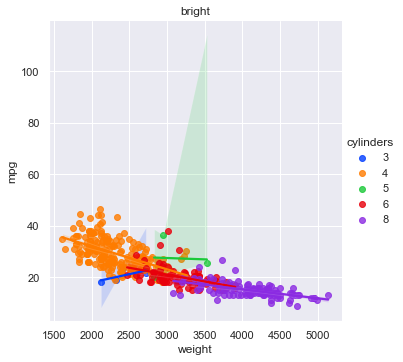

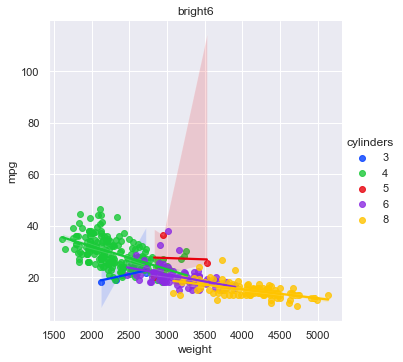

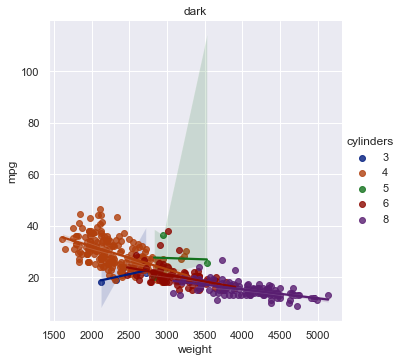

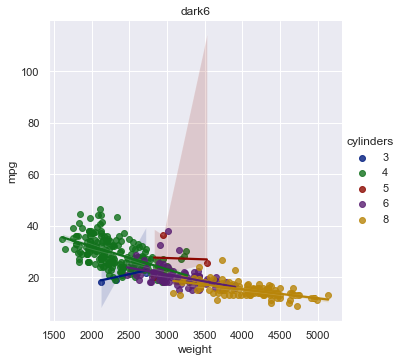

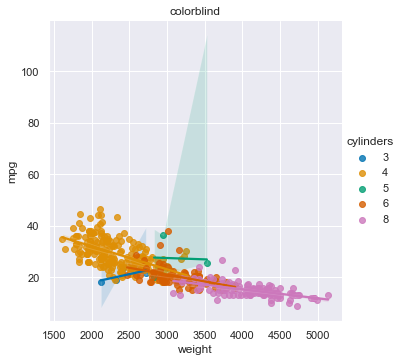

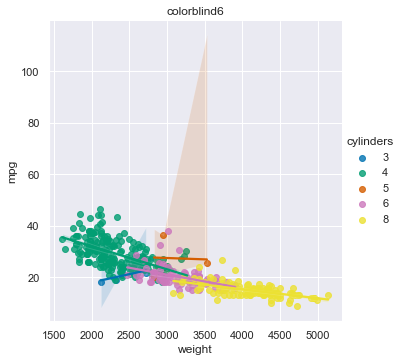

In [11]:
plt.clf()

for i, p in enumerate(sns.palettes.SEABORN_PALETTES):
    sns.set_palette(p)
    sns.lmplot(x='weight', y='mpg', data=mpg, hue='cylinders').set(title=p)

plt.show()

## Displaying Palettes
 - sns.palplot() function displays a palette
 - sns.color_palette() returns the current palette

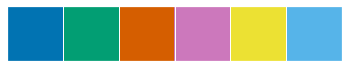

In [12]:
sns.palplot(sns.color_palette())

deep


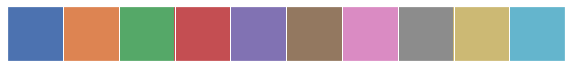

deep6


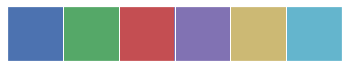

muted


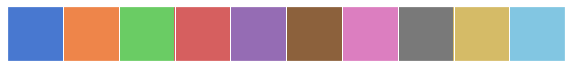

muted6


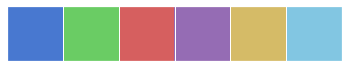

pastel


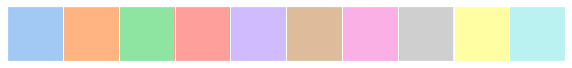

pastel6


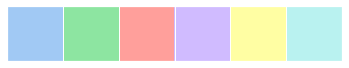

bright


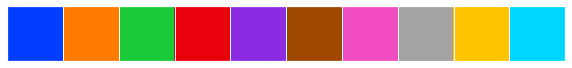

bright6


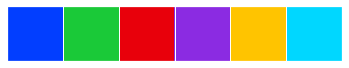

dark


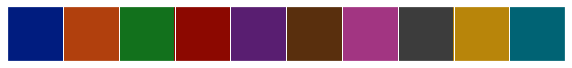

dark6


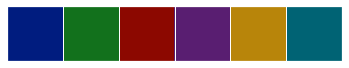

colorblind


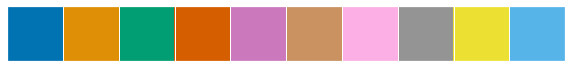

colorblind6


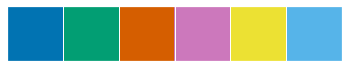

In [13]:
for p in sns.palettes.SEABORN_PALETTES:
    print(p)
    sns.set_palette(p)
    sns.palplot(sns.color_palette())
    plt.show()

## Defining Custom Palettes

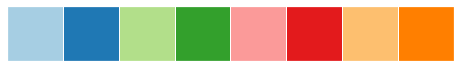

In [14]:
# Circular colors = when the data is not ordered
sns.palplot(sns.color_palette("Paired", 8))
plt.show()

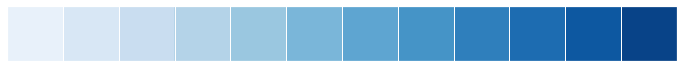

In [15]:
# Sequential colors = when the data has a consistent range from high to low
sns.palplot(sns.color_palette("Blues", 12))
plt.show()

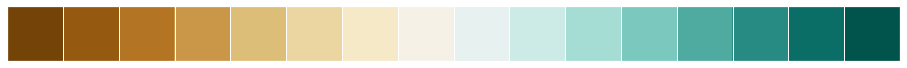

In [16]:
# Diverging colors = when both the low and high values are interesting
sns.palplot(sns.color_palette("BrBG", 16))
plt.show()

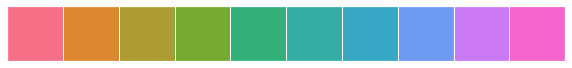

In [17]:
sns.palplot(sns.color_palette('husl', 10))
plt.show()

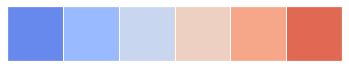

In [18]:
sns.palplot(sns.color_palette('coolwarm', 6))
plt.show()

# Customizing with matplotlib

## Further Customizations
 - The axes object supports many common customizations

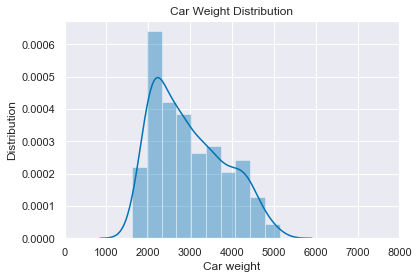

In [19]:
fig, ax = plt.subplots()
sns.distplot(mpg['weight'], ax=ax)
ax.set(xlabel='Car weight', 
       ylabel='Distribution', 
       xlim=(0, 8000),
       title='Car Weight Distribution')
plt.show()

## Combining Plots 
 - It is possible to combine and configure multiple plots

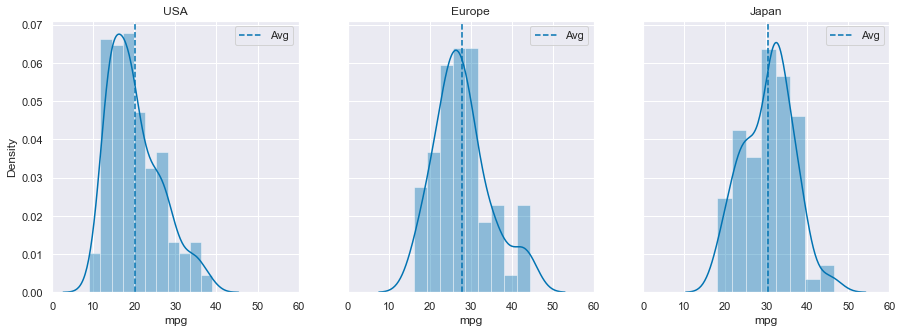

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))

sns.distplot(mpg.query('origin == "usa"')['mpg'], ax=ax0)
ax0.set(title='USA', xlim=(0, 60))
ax0.axvline(x=mpg.query('origin == "usa"')['mpg'].mean(), label='Avg', linestyle='--')
ax0.legend()

sns.distplot(mpg.query('origin == "europe"')['mpg'], ax=ax1)
ax1.set(title='Europe', xlim=(0, 60))
ax1.axvline(x=mpg.query('origin == "europe"')['mpg'].mean(), label='Avg', linestyle='--')
ax1.legend()

sns.distplot(mpg.query('origin == "japan"')['mpg'], ax=ax2)
ax2.set(title='Japan', xlim=(0, 60))
ax2.axvline(x=mpg.query('origin == "japan"')['mpg'].mean(), label='Avg', linestyle='--')
ax2.legend()

plt.show()